In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

<div>
<h1>1. Simple Linear Regression</h1>
<!-- <img src="meme.jpg" width="500"/> -->
</div>

In [21]:
# Data Source: https://www.kaggle.com/datasets/mirichoi0218/insurance
data = pd.read_csv("some_Kaggle_data.csv")
df = pd.DataFrame()
df["x"] = data["age"].values
df["y"] = data["charges"].values
df.head(10)

,x,y
0,19,16884.92400
1,18,1725.55230
2,28,4449.46200
3,33,21984.47061
4,32,3866.85520
5,31,3756.62160
6,46,8240.58960
7,37,7281.50560
8,37,6406.41070
9,60,28923.13692


<div style="font-size: 18px">
$$
\begin{align}
\text{model: } \hat{y}^{(i)} &= h(x^{(i)}) \\
&= \beta_0 + \beta_1x^{(i)} \\
\text{Loss function: } \mathcal{L} &=  \frac{1}{2n} \sum (y^{(i)}-\hat{y}^{(i)})^2 \\ 
\end{align}
$$
</div>

In [30]:
from sklearn.linear_model import LinearRegression
model_simple_lr = LinearRegression()
X, y = df["x"].values.reshape(-1,1), df["y"].values.reshape(-1,1)
model_simple_lr.fit(X,y)

beta_0 = model_simple_lr.intercept_[0]
beta_1 = model_simple_lr.coef_[0][0]
print(f"Model: h(x) = {beta_0} + {beta_1} x")

Model: h(x) = 3165.885006063014 + 257.7226186668958 x


Text(0, 0.5, 'y')

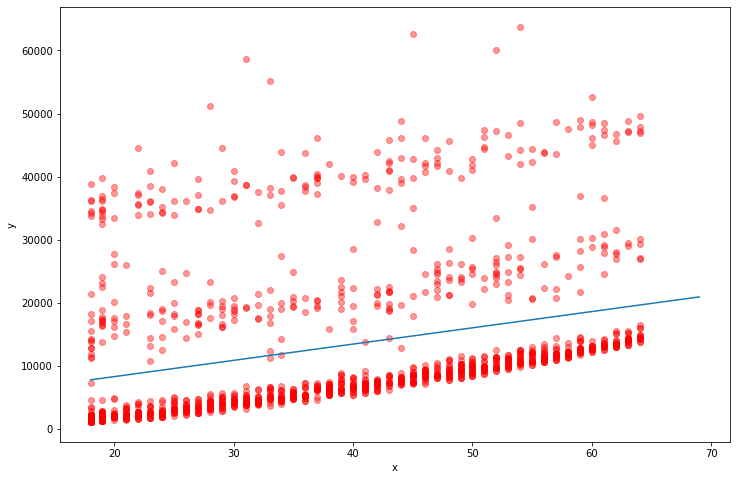

In [46]:
def graph(x_range):  
    x = np.array(x_range)  
    y = beta_0+beta_1*x 
    plt.plot(x, y)  

plt.figure(figsize=(12,8))
plt.scatter(X,y, c = "red",alpha=.4, marker = 'o')
graph(range(18,70))
plt.xlabel('x')
plt.ylabel('y')

<div>
<h1>2. Multiple Linear Regression</h1>
<!-- <img src="meme.jpg" width="500"/> -->
</div>

In [48]:
df = df.rename(columns={'x': 'x_1'})
df["x_2"] = data["bmi"].values
df = df[["x_1", "x_2", "y"]]
df.head(10)

,x_1,x_2,y
0,19,27.900,16884.92400
1,18,33.770,1725.55230
2,28,33.000,4449.46200
3,33,22.705,21984.47061
4,32,28.880,3866.85520
5,31,25.740,3756.62160
6,46,33.440,8240.58960
7,37,27.740,7281.50560
8,37,29.830,6406.41070
9,60,25.840,28923.13692


<div style="font-size: 18px">
$$
\begin{align}
\text{model: } \hat{y}^{(i)} &= h(x^{(i)}) \\
&= \beta_0 + \beta_1x_1^{(i)} + \beta_2x_2^{(i)} \\
\text{Loss function: } \mathcal{L} &=  \frac{1}{2n} \sum (y^{(i)}-\hat{y}^{(i)})^2 \\ 
\end{align}
$$
</div>

In [50]:
model_multiple_lr = LinearRegression()
X, y = df[["x_1", "x_2"]].values, df["y"].values.reshape(-1,1)
model_multiple_lr.fit(X,y)

beta_0 = model_multiple_lr.intercept_[0]
beta_1, beta_2 = model_multiple_lr.coef_[0][0], model_multiple_lr.coef_[0][1]
print(f"Model: h(x) = {beta_0} + {beta_1} x_1 + {beta_2} x_2")

Model: h(x) = -6424.804612240776 + 241.93077790108188 x_1 + 332.9650908144038 x_2


<div>
<h1>3. Ridge Regression</h1>
<!-- <img src="meme.jpg" width="500"/> -->
</div>

<div style="font-size: 18px">
$$
\begin{align}
\text{model: } \hat{y}^{(i)} &= h(x^{(i)}) \\
&= \beta_0 + \beta_1x_1^{(i)} + \beta_2x_2^{(i)} \\
\text{Loss function: } \mathcal{L} &=  \frac{1}{2n} \sum (y^{(i)}-\hat{y}^{(i)})^2 + \lambda \sum \beta_j^2 \\ 
\end{align}
$$  
</div>
<br>
<div style="font-size: 18px">
Adding this term is equivalent to adding an extra constraint on the possible values of $\beta$. Because to achieve the minimum loss, the sum of $\beta_j^2$’s must not exceed a certain value (say $r$). This technique prevents the model from assigning very large weights to some features over the others thus tackling overfitting. Mathematically,

$$\sum \beta_j^2 \leq r$$

</div>

<br>
<img src="ridge.png" width="500"/> 

In [87]:
from sklearn.linear_model import Ridge
model_ridge_lr = Ridge(alpha=10)
X, y = df[["x_1", "x_2"]].values, df["y"].values.reshape(-1,1)
model_ridge_lr.fit(X,y)

beta_0 = model_ridge_lr.intercept_[0]
beta_1, beta_2 = model_ridge_lr.coef_[0][0], model_ridge_lr.coef_[0][1]
print(f"Model: h(x) = {beta_0} + {beta_1} x_1 + {beta_2} x_2")

Model: h(x) = -6422.560640393756 + 241.9247146248472 x_1 + 332.8996626809615 x_2


<div>
<h1>4. Lasso Regression</h1>
</div>

<div style="font-size: 18px">
$$
\begin{align}
\text{model: } \hat{y}^{(i)} &= h(x^{(i)}) \\
&= \beta_0 + \beta_1x_1^{(i)} + \beta_2x_2^{(i)} \\
\text{Loss function: } \mathcal{L} &=  \frac{1}{2n} \sum (y^{(i)}-\hat{y}^{(i)})^2 + \lambda \sum |\beta_j| \\ 
\end{align}
$$
</div>
<br>
<div style="font-size: 18px">
Here the constraint can be written as...

$$\sum |\beta_j| \leq r$$

</div>
<br>
<img src="lasso.png" width="500"/> 

In [88]:
from sklearn.linear_model import Lasso
model_lasso_lr = Lasso(alpha=10)
X, y = df[["x_1", "x_2"]].values, df["y"].values.reshape(-1,1)
model_lasso_lr.fit(X,y)

beta_0 = model_lasso_lr.intercept_[0]
beta_1, beta_2 = model_lasso_lr.coef_[0], model_lasso_lr.coef_[1]
print(f"Model: h(x) = {beta_0} + {beta_1} x_1 + {beta_2} x_2")

Model: h(x) = -6415.344916904352 + 241.89241339547638 x_1 + 332.7056434600767 x_2


<div>
<h1>4. Polynomial Linear Regression</h1>
</div>

<div style="font-size: 18px">
$$
\begin{align}
\text{model: } \hat{y}^{(i)} &= h(x^{(i)}) \\
&= \beta_0 + \beta_1x_1^{(i)} + \beta_2(x_1^{(i)})^2 + \beta_3(x_2^{(i)})^3 \\
\text{Loss function: } \mathcal{L} &=  \frac{1}{2n} \sum (y^{(i)}-\hat{y}^{(i)})^2 \\ 
\end{align}
$$
</div>

In [102]:
df["x_1^2"] = df["x_1"].apply(lambda x:x**2)
df["x_2^3"] = df["x_2"].apply(lambda x:x**3)
model_poly_lr = LinearRegression()
X, y = df[["x_1", "x_2", "x_1^2", "x_2^3"]].values, df["y"].values.reshape(-1,1)
model_poly_lr.fit(X,y)

beta_0 = model_poly_lr.intercept_[0]
beta_1, beta_2, beta_3 = model_poly_lr.coef_[0][0], model_poly_lr.coef_[0][1], model_poly_lr.coef_[0][2]
print(f"Model: h(x) = {beta_0} + {beta_1} x_1 + {beta_2} x_1^2 + {beta_3} x_2^3")

Model: h(x) = -5784.106781338571 + 77.31206238303535 x_1 + 443.86130657629445 x_1^2 + 2.070077184514986 x_2^3


<div>
<h1>5. KNN Regression</h1>
</div>

</div>
<br>
<img src="knn.png" width="500"/>
<br>
<div style="font-size: 18px">
$$
\begin{align}
\text{model: } \hat{y}^{(i)} &= h(x^{(i)}) \\
&= \frac{1}{k}\sum_{j \in ~ neigh(i)} y^{(j)} \\ \\
\text{weighted model: } \hat{y}^{(i)} &= h(x^{(i)})\\ 
&= \frac{\sum_{j \in ~ neigh(i)} y^{(j)} * invdist(x^{(i)}, x^{(j)})}  {\sum_{j \in ~ neigh(i)} invdist(x^{(i)}, x^{(j)})}
\end{align}
$$
</div>

In [94]:
from sklearn.neighbors import KNeighborsRegressor
model_knn_lr = KNeighborsRegressor(n_neighbors=3)
model_knn_lr.fit(X, y)
model_knn_lr.predict([[20, 30]])[0][0]

2853.311833333333